In [1]:
import os
import re
import glob
import numpy as np
import gpxpy
import gpxpy.gpx
import filament
import GPX_functions
import gpxpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from osgeo import gdal, osr
import logging
from importlib import reload
reload(GPX_functions)

<module 'GPX_functions' from '/home/ctroupin/Projects/Perso/trail-running-maps/python/GPX_functions.py'>

In [ ]:
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fontfile = "/home/ctroupin/.fonts/D-DIN-Bold.ttf"
myfont = FontProperties(fname=fontfile)
fontfile2 = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont2 = FontProperties(fname=fontfile2)

In [4]:
figdir = "../images/Olne-Spa-Oln"
if not os.path.exists(figdir):
    os.mkdir(figdir)
datafilelist = sorted(glob.glob(os.path.join("/data/GPX/TGC/", "*.gpx")))

In [5]:
visfile = "/data/Visible/Sentinel-2_L1C_2019-09-13.tiff"
visfile = "/data/GPX/TGC/2021-01-20-00 00_2021-01-20-23 59_Sentinel-2_L1C_True_color.tiff"
os.path.isfile(visfile)

True

In [6]:
placelabels = {"Cruz de Tejeda": (28.005933, -15.599418),
               "Roque Nublo": (27.968332, -15.610662),
               "Arucas": (28.11356822330643, -15.518575250102815),
               "Fagajesto": (28.05787823258515, -15.645223794638907),
               "Tunte": (27.925502, -15.573327),
               "Puerto de las Nieves": (28.102034, -15.710078),
               "Teror": (28.061041, -15.546773),
               "Maspalomas": (27.735080, -15.598714),
               "Ayagaures": (27.851501, -15.607170),
               "Las Palmas\nde Gran Canaria": (28.133707, -15.434640),
               "Artenara": (28.021498, -15.649266),
               "Soria": (27.905832, -15.667758)}
deltax = 0.01

In [7]:
GC = filament.Visible()
GC.read_geotiff(visfile)

In [8]:
def get_year(filename):
    fname = os.path.basename(filename)
    m = re.search("(\d{4})", fname)
    if m:
        year = m.group(0)
    else:
        year = ''
        
    return year

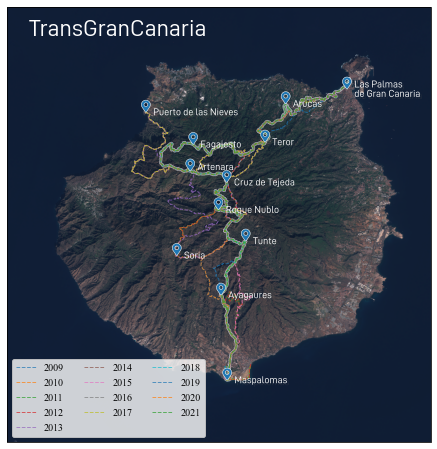

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
    
    if place == "Artenara":
        t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    else:
        t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
            
    #t.set_path_effects([path_effects.PathPatchEffect(offset=(0.2, -0.2), facecolor="w",
    #                                                 edgecolor=".7", linewidth=.5)])

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    if year == "2021":
        ax.plot(lon, lat, "-", lw=3, color="w", zorder=5, alpha=.5)
    
    ax.plot(lon, lat, "--", lw=1, label=year, zorder=6, alpha=.7)

    
plt.legend(loc=3, ncol=3)
plt.text(0.05, 0.97, 'TransGranCanaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

#ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig(os.path.join(figdir, "TGC_all001.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


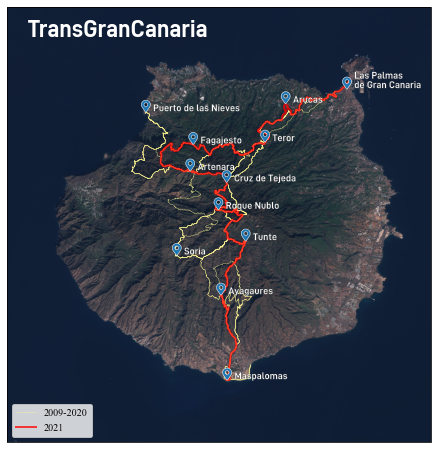

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
    
    #if place == "Artenara":
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    #else:
   #     t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
   #                 fontproperties=myfont,
   #                 zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
            
    t.set_path_effects([path_effects.PathPatchEffect(facecolor="w",
                                                     edgecolor=".1", linewidth=.2)])

for iii, df in enumerate(datafilelist[0:-1]):
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)

    if iii == 0:
        ax.plot(lon, lat, "-", lw=.5, color="#FFF792", zorder=6, alpha=.7,
                label="2009-2020")
    else:        
        ax.plot(lon, lat, "-", lw=.5, color="#FFF792", zorder=6, alpha=.7)

df = datafilelist[-1]
lon, lat, ele, t = GPX_functions.read_gpx(df)
year = get_year(df)
ax.plot(lon, lat, "-", lw=2, color="r", zorder=7, alpha=.75, label="2021")

    
plt.legend(loc=3, ncol=1)
plt.text(0.05, 0.97, 'TransGranCanaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

#ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig(os.path.join(figdir, "TGC_all002.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

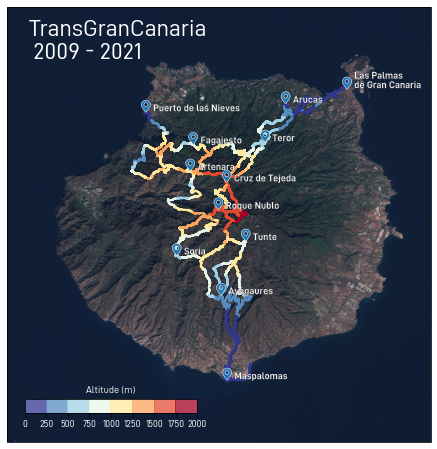

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
    
    #if place == "Artenara":
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    #else:
   #     t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
   #                 fontproperties=myfont,
   #                 zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
            
    t.set_path_effects([path_effects.PathPatchEffect(facecolor="w",
                                                     edgecolor=".1", linewidth=.2)])

cmap = plt.cm.RdYlBu_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=1900., alpha=.75, 
                      zorder=6, norm=norm, cmap=cmap)

fig_coord = [0.175,0.175,0.30,0.025]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="horizontal", norm=norm) 
cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
plt.setp(cbytick_obj, color='w', fontproperties=myfont2)
cb.ax.set_title("Altitude (m)", fontproperties=myfont2, color='w')

plt.text(0.05, 0.97, 'TransGranCanaria\n 2009 - 2021', fontproperties=myfont2,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)
    
#ax.add_feature(coast, linewidth=.2, color=".5")
#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['coastlines'])

plt.savefig(os.path.join(figdir, "TGC_all003.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Without satellite image

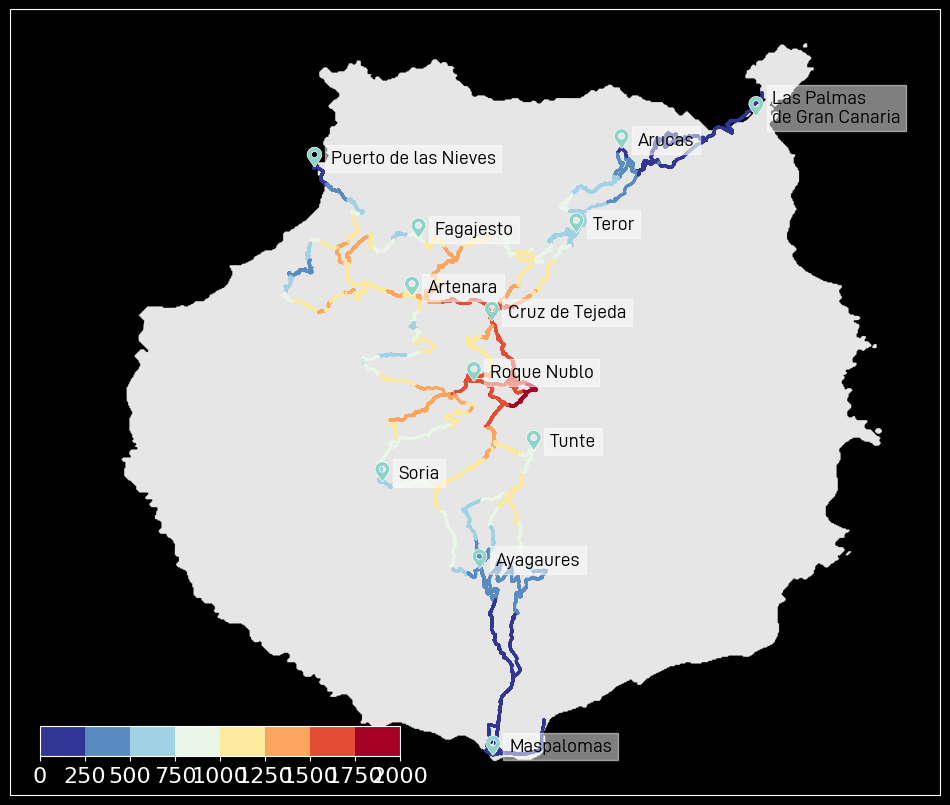

In [56]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
ax.set_xlim(-15.9, -15.32)
ax.set_ylim(27.71, 28.2)

for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=14, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
                        
    t = ax.text(coords[1] + deltax, coords[0] + .5 * deltax, place, fontsize=14, ha="left", va="center", 
                fontproperties=myfont2,
                zorder=8, color="k")
    
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
    

cmap = plt.cm.RdYlBu_r
bounds = np.arange(0, 2001., 250.)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    year = get_year(df)
    scat = ax.scatter(lon, lat, s=1, c=ele, vmin=0., vmax=1900.,
                      zorder=6, norm=norm, cmap=cmap)

fig_coord = [0.15,0.2,0.30,0.025]
cbar_ax = fig.add_axes(fig_coord)
cb = plt.colorbar(scat, cax=cbar_ax, orientation="horizontal", norm=norm) 
cbytick_obj = plt.getp(cb.ax.axes, 'xticklabels')                #tricky
cb.ax.set_title("Altitude (m)", fontproperties=myfont2, color='k')
ax.add_feature(coast, linewidth=.2, color=".9")
plt.savefig(os.path.join(figdir, "TGC_all004.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Other races in Gran Canaria

In [9]:
racedir = "../../RandoGC/GPX/Races/"
racefilelist = sorted(glob.glob(os.path.join(racedir, "*.gpx")))
racefilelist

['../../RandoGC/GPX/Races/40-km-guayadeque-xtrem.gpx',
 '../../RandoGC/GPX/Races/Aguimes-Lagartrail-26km.gpx',
 '../../RandoGC/GPX/Races/ArtenaraTrail.gpx',
 '../../RandoGC/GPX/Races/Arucas-LaGoleta-24km.gpx',
 '../../RandoGC/GPX/Races/Arucas_traildelnorte_42km.gpx',
 '../../RandoGC/GPX/Races/ElPuertillo-SantaLucia-.gpx',
 '../../RandoGC/GPX/Races/ElRoman-10km.gpx',
 '../../RandoGC/GPX/Races/FENIX-TRAIL-LARGA.gpx',
 '../../RandoGC/GPX/Races/Firgas-ruta-doramas-2019-larga.gpx',
 '../../RandoGC/GPX/Races/Galdar-Cebolla-.gpx',
 '../../RandoGC/GPX/Races/Galdar-EntreCortijos-26km.gpx',
 '../../RandoGC/GPX/Races/Galdar-Saucillo-.gpx',
 '../../RandoGC/GPX/Races/LaAldaTrail.gpx',
 '../../RandoGC/GPX/Races/LaAldea-paralelo28-42km.gpx',
 '../../RandoGC/GPX/Races/Moya-Extrema-32km.gpx',
 '../../RandoGC/GPX/Races/SanMateo-urbanTrail-12km.gpx',
 '../../RandoGC/GPX/Races/Tamadaba Trail Ultra 2019.gpx',
 '../../RandoGC/GPX/Races/Tasartico-Guguy-trail-.gpx',
 '../../RandoGC/GPX/Races/Tejeda-CircularLa

In [63]:
reload(GPX_functions)

<module 'GPX_functions' from '/home/ctroupin/Projects/Perso/trail-running-maps/python/GPX_functions.py'>

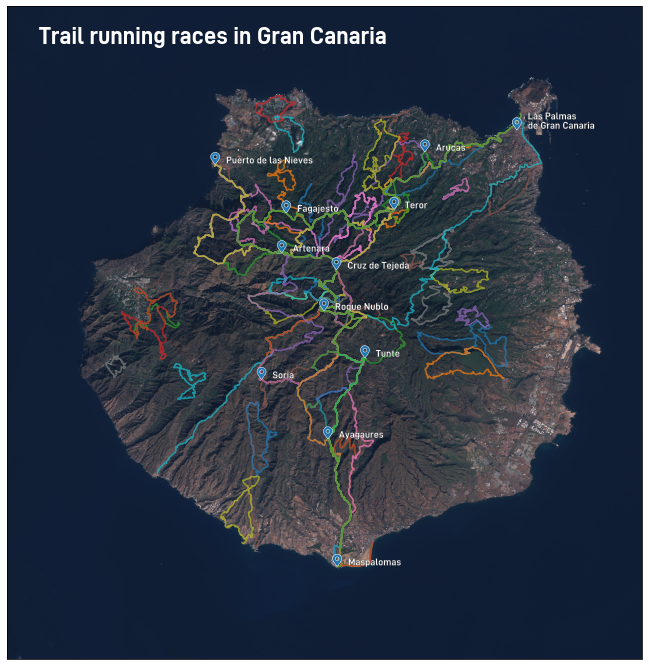

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)
GC.add_to_plot(ax, myproj)
ax.set_xlim(-15.9, -15.32)


for place, coords in placelabels.items():
    t1 = ax.text(coords[1], coords[0], "\uf3c5", fontproperties=fp1,
            fontsize=12, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
    t1.set_path_effects([path_effects.PathPatchEffect(edgecolor='white', linewidth=.5)])
    
    #if place == "Artenara":
    t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="bottom", 
                    fontproperties=myfont,
                    zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    #else:
   #     t = ax.text(coords[1] + deltax, coords[0], place, fontsize=10, ha="left", va="center", 
   #                 fontproperties=myfont,
   #                 zorder=8, color="w", path_effects=[path_effects.withSimplePatchShadow()])
    
            
    t.set_path_effects([path_effects.PathPatchEffect(facecolor="w",
                                                     edgecolor=".1", linewidth=.2)])

for iii, df in enumerate(racefilelist):
    # print(f"Working on file {df}")
    lon, lat = GPX_functions.read_gpx_latlon(df)

    ax.plot(lon, lat, "-", lw=1.5, zorder=6, alpha=.7)

for iii, df in enumerate(datafilelist):
    # print(f"Working on file {df}")
    lon, lat = GPX_functions.read_gpx_latlon(df)

    ax.plot(lon, lat, "-", lw=1.5, zorder=6, alpha=.7)


plt.text(0.05, 0.97, 'Trail running races in Gran Canaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)

plt.savefig(os.path.join(figdir, "GC_races5.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [17]:
import cartopy
import cartopy.crs as ccrs
import contextily as ctx
import configparser
import hikinggc

config = configparser.ConfigParser()
config.read("/etc/config.txt")
apikey = config.get("configuration", "thunderkey")
basemap = ctx.providers.Thunderforest.OpenCycleMap
#basemap = ctx.providers.CartoDB["DarkMatterNoLabels"]
basemap["url"] = "https://{s}.tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=%s" %(apikey)
proj = ccrs.epsg(3857)
basemap['apikey'] = apikey
basemap

{'url': 'https://{s}.tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=ae9ca0847f82405693ead4840c01ad17',
 'attribution': '(C) Thunderforest, (C) OpenStreetMap contributors',
 'variant': 'cycle',
 'apikey': 'ae9ca0847f82405693ead4840c01ad17',
 'max_zoom': 22,
 'name': 'Thunderforest.OpenCycleMap'}

Working on file ../../RandoGC/GPX/Races/40-km-guayadeque-xtrem.gpx
Working on file ../../RandoGC/GPX/Races/Aguimes-Lagartrail-26km.gpx
Working on file ../../RandoGC/GPX/Races/ArtenaraTrail.gpx
Working on file ../../RandoGC/GPX/Races/Arucas-LaGoleta-24km.gpx
Working on file ../../RandoGC/GPX/Races/Arucas_traildelnorte_42km.gpx
Working on file ../../RandoGC/GPX/Races/ElPuertillo-SantaLucia-.gpx
Working on file ../../RandoGC/GPX/Races/ElRoman-10km.gpx
Working on file ../../RandoGC/GPX/Races/FENIX-TRAIL-LARGA.gpx
Working on file ../../RandoGC/GPX/Races/Firgas-ruta-doramas-2019-larga.gpx
Working on file ../../RandoGC/GPX/Races/Galdar-Cebolla-.gpx


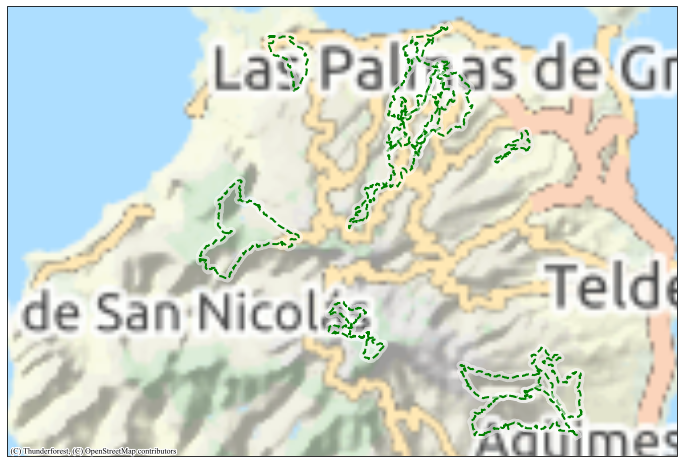

In [42]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=proj)

for iii, df in enumerate(racefilelist[0:10]):
    print(f"Working on file {df}")
    track = hikinggc.Track()
    track.get_coords(df)
    track.add_track(ax)

"""
for iii, df in enumerate(datafilelist[0:2]):
    print(f"Working on file {df}")
    track = hikinggc.Track()
    track.get_coords(df)
    track.add_track(ax)


plt.text(0.05, 0.97, 'Trail running races in Gran Canaria', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=24)
"""

if basemap is not None:
    ctx.add_basemap(ax, source=basemap, origin='upper', zoom=9)

ax.set_xlim(-1762500.526009047, -1712000)

ax.set_xticks([])
ax.set_yticks([])

#plt.savefig(os.path.join(figdir, "sleeping05.jpg"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [41]:
ax.get_xlim()

(-1762500.526009047, -1713000.0)

In [23]:
 ctx.add_basemap?

## Bar plots (distance and elevation)

In [67]:
distance2Dlist = []
distance3Dlist = []
uphilllist = []
for datafile in datafilelist:
    gpx_file = open(datafile)
    gpx = gpxpy.parse(gpx_file)
    d2d = gpx.length_2d()
    d3d = gpx.length_3d()
    dplus, dminus = gpx.get_uphill_downhill()
    uphilllist.append(dplus)
    distance2Dlist.append(d2d / 1000.)
    distance3Dlist.append(d3d / 1000.)

In [50]:
yearlist = [get_year(datafile) for datafile in datafilelist]

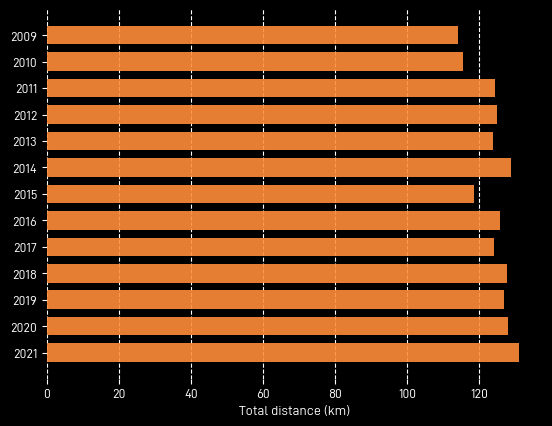

In [73]:
fig, ax = plt.subplots()

y_pos = np.arange(len(distance2Dlist))

ax.barh(y_pos, distance3Dlist, align='center', zorder=4, color="#FF8C39", alpha=.9, height=.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(yearlist, fontsize=20)
ax.invert_yaxis()  

for tick in ax.get_xticklabels():
    tick.set_font_properties(myfont2)
for tick in ax.get_yticklabels():
    tick.set_font_properties(myfont2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(zorder=2, linestyle="--", axis="x")

ax.set_xlabel('Total distance (km)', fontproperties=myfont2)
plt.savefig(os.path.join(figdir, "TGC_dist.jpg"), dpi=300, bbox_inches="tight")

plt.show()

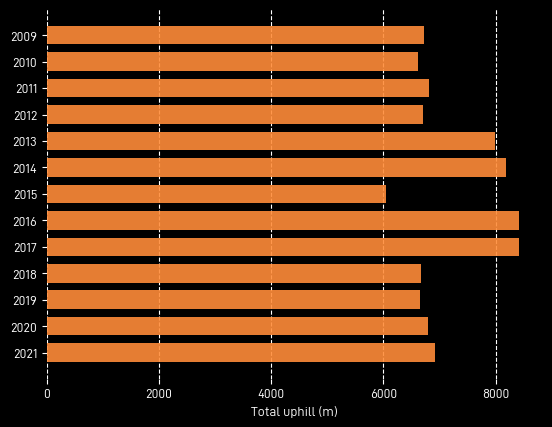

In [72]:
fig, ax = plt.subplots()

y_pos = np.arange(len(distance2Dlist))

ax.barh(y_pos, uphilllist, align='center', zorder=4, color="#FF8C39", alpha=.9, height=.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(yearlist, fontsize=20)
ax.invert_yaxis()  

for tick in ax.get_xticklabels():
    tick.set_font_properties(myfont2)
for tick in ax.get_yticklabels():
    tick.set_font_properties(myfont2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(zorder=2, linestyle="--", axis="x")

ax.set_xlabel('Total uphill (m)', fontproperties=myfont2)
plt.savefig(os.path.join(figdir, "TGC_uphill.jpg"), dpi=300, bbox_inches="tight")

plt.show()